# Project for Predict the sales

### Importing Needed packages

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,root_mean_squared_error

### Reading the data

In [3]:
my_data = pd.read_csv("./sales.csv", dtype={"state_holiday": str}, low_memory=False)
my_data.head()

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,260670,166,2,2013-01-01,0,0,0,a,1,0
1,366950,278,2,2013-01-01,0,0,0,a,1,0
2,179596,519,2,2013-01-01,0,0,0,a,1,0
3,216955,234,2,2013-01-01,0,0,0,a,1,0
4,201196,270,2,2013-01-01,0,0,0,a,1,0


### EDA

In [4]:
my_data.shape

(592561, 10)

In [5]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592561 entries, 0 to 592560
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           592561 non-null  int64 
 1   store_ID             592561 non-null  int64 
 2   day_of_week          592561 non-null  int64 
 3   date                 592561 non-null  object
 4   nb_customers_on_day  592561 non-null  int64 
 5   open                 592561 non-null  int64 
 6   promotion            592561 non-null  int64 
 7   state_holiday        592561 non-null  object
 8   school_holiday       592561 non-null  int64 
 9   sales                592561 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 45.2+ MB


In [6]:
print(my_data.isnull().sum())

Unnamed: 0             0
store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
dtype: int64


In [7]:
print(my_data["state_holiday"].value_counts())

state_holiday
0    575132
a     11363
b      3167
c      2899
Name: count, dtype: int64


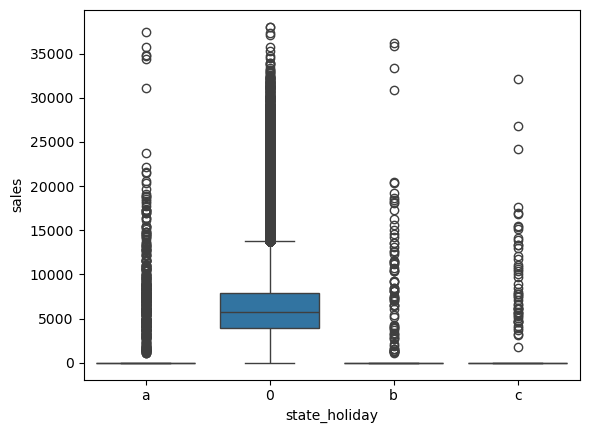

In [8]:
sns.boxplot(x=my_data["state_holiday"], y=my_data["sales"])
plt.show()

In [9]:
my_data = pd.get_dummies(my_data, columns=['state_holiday'], drop_first=True)

In [10]:
my_data.head()

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,school_holiday,sales,state_holiday_a,state_holiday_b,state_holiday_c
0,260670,166,2,2013-01-01,0,0,0,1,0,True,False,False
1,366950,278,2,2013-01-01,0,0,0,1,0,True,False,False
2,179596,519,2,2013-01-01,0,0,0,1,0,True,False,False
3,216955,234,2,2013-01-01,0,0,0,1,0,True,False,False
4,201196,270,2,2013-01-01,0,0,0,1,0,True,False,False


In [11]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592561 entries, 0 to 592560
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           592561 non-null  int64 
 1   store_ID             592561 non-null  int64 
 2   day_of_week          592561 non-null  int64 
 3   date                 592561 non-null  object
 4   nb_customers_on_day  592561 non-null  int64 
 5   open                 592561 non-null  int64 
 6   promotion            592561 non-null  int64 
 7   school_holiday       592561 non-null  int64 
 8   sales                592561 non-null  int64 
 9   state_holiday_a      592561 non-null  bool  
 10  state_holiday_b      592561 non-null  bool  
 11  state_holiday_c      592561 non-null  bool  
dtypes: bool(3), int64(8), object(1)
memory usage: 42.4+ MB


In [12]:
my_data['date'] = pd.to_datetime(my_data['date'])

In [13]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592561 entries, 0 to 592560
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0           592561 non-null  int64         
 1   store_ID             592561 non-null  int64         
 2   day_of_week          592561 non-null  int64         
 3   date                 592561 non-null  datetime64[ns]
 4   nb_customers_on_day  592561 non-null  int64         
 5   open                 592561 non-null  int64         
 6   promotion            592561 non-null  int64         
 7   school_holiday       592561 non-null  int64         
 8   sales                592561 non-null  int64         
 9   state_holiday_a      592561 non-null  bool          
 10  state_holiday_b      592561 non-null  bool          
 11  state_holiday_c      592561 non-null  bool          
dtypes: bool(3), datetime64[ns](1), int64(8)
memory usage: 42.4 MB


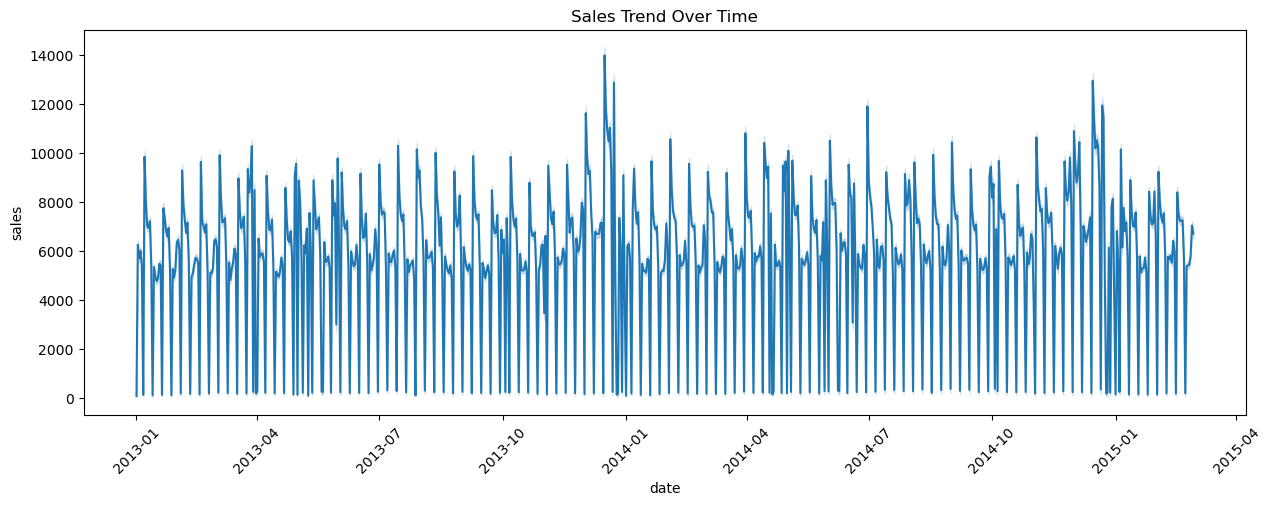

In [14]:
plt.figure(figsize=(15,5))
sns.lineplot(x=my_data["date"], y=my_data["sales"])
plt.xticks(rotation=45)  
plt.title("Sales Trend Over Time")
plt.show()

In [15]:
my_data["year"] = my_data["date"].dt.year
my_data["month"] = my_data["date"].dt.month
my_data["day"] = my_data["date"].dt.day
my_data["weekday"] = my_data["date"].dt.weekday  

In [16]:
my_data.drop(columns=['Unnamed: 0', 'date'], inplace=True)

In [17]:
my_data.head()

,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales,state_holiday_a,state_holiday_b,state_holiday_c,year,month,day,weekday
0,166,2,0,0,0,1,0,True,False,False,2013,1,1,1
1,278,2,0,0,0,1,0,True,False,False,2013,1,1,1
2,519,2,0,0,0,1,0,True,False,False,2013,1,1,1
3,234,2,0,0,0,1,0,True,False,False,2013,1,1,1
4,270,2,0,0,0,1,0,True,False,False,2013,1,1,1


In [18]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592561 entries, 0 to 592560
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   store_ID             592561 non-null  int64
 1   day_of_week          592561 non-null  int64
 2   nb_customers_on_day  592561 non-null  int64
 3   open                 592561 non-null  int64
 4   promotion            592561 non-null  int64
 5   school_holiday       592561 non-null  int64
 6   sales                592561 non-null  int64
 7   state_holiday_a      592561 non-null  bool 
 8   state_holiday_b      592561 non-null  bool 
 9   state_holiday_c      592561 non-null  bool 
 10  year                 592561 non-null  int32
 11  month                592561 non-null  int32
 12  day                  592561 non-null  int32
 13  weekday              592561 non-null  int32
dtypes: bool(3), int32(4), int64(7)
memory usage: 42.4 MB


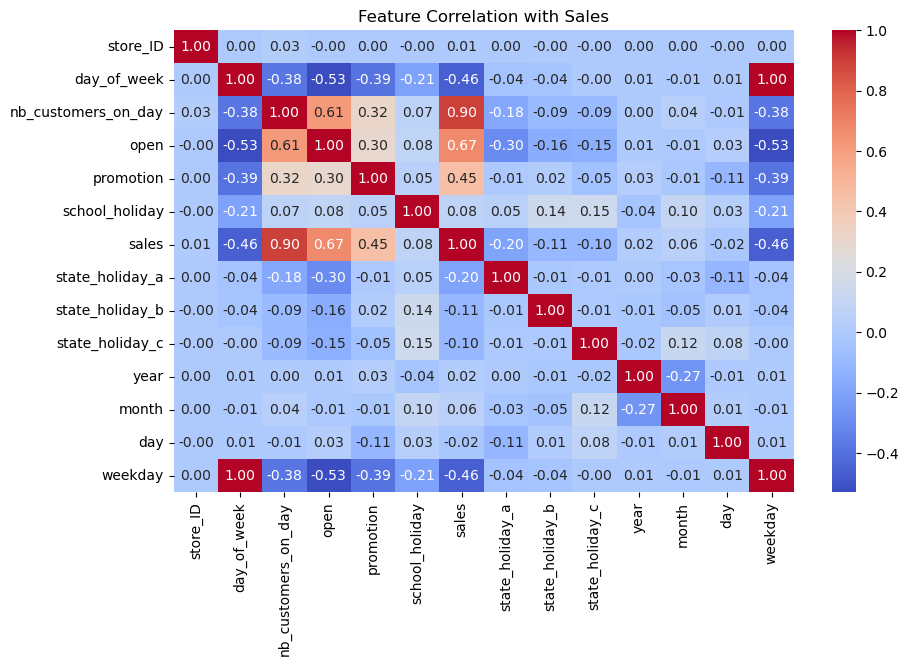

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(my_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation with Sales")
plt.show()

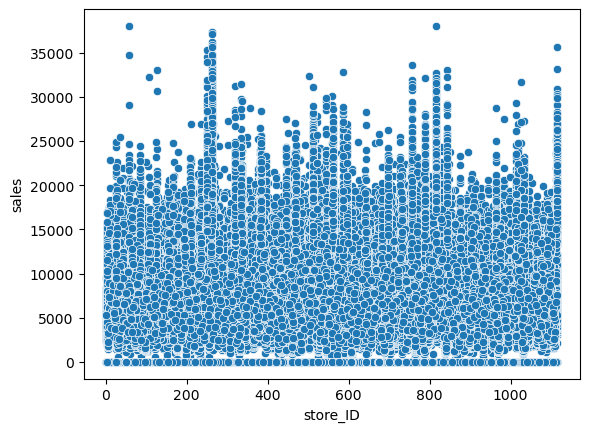

In [20]:
s = sns.scatterplot(x=my_data["store_ID"], y=my_data["sales"])
plt.show()

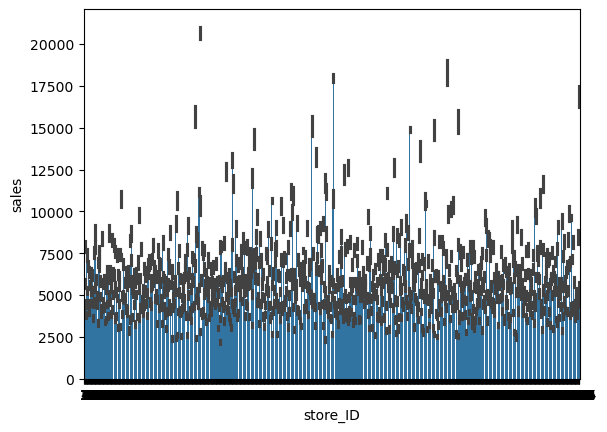

In [21]:
s = sns.barplot(x=my_data["store_ID"], y=my_data["sales"])
plt.show()

In [22]:
my_data.drop(columns=["store_ID", "state_holiday_b", "state_holiday_c", "year", "month", "day"], inplace=True)

In [23]:
print(my_data.corr()["sales"])

day_of_week           -0.458726
nb_customers_on_day    0.897044
open                   0.674661
promotion              0.451301
school_holiday         0.077069
sales                  1.000000
state_holiday_a       -0.200188
weekday               -0.458726
Name: sales, dtype: float64


In [24]:
my_data.head()

,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales,state_holiday_a,weekday
0,2,0,0,0,1,0,True,1
1,2,0,0,0,1,0,True,1
2,2,0,0,0,1,0,True,1
3,2,0,0,0,1,0,True,1
4,2,0,0,0,1,0,True,1


## Modeling 

### Linear Regression &&  Random Forest models with droping those columns=["store_ID", "state_holiday_b", "state_holiday_c", "year", "month", "day"], we indict this from the Feature Correlation plots

In [25]:
X = my_data.drop('sales', axis=1) 
y = my_data['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
print("Average sales", my_data["sales"].mean())

Average sales 5744.577430846782


In [27]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = root_mean_squared_error(y_test, y_pred_lr)

print(f"Linear Regression R² Score: {r2_lr:.4f}")
print(f"Linear Regression MAE: {mae_lr:.2f}")
print(f"Linear Regression RMSE: {rmse_lr:.2f}")

Linear Regression R² Score: 0.8552
Linear Regression MAE: 971.20
Linear Regression RMSE: 1459.19


In [29]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np 

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"Random Forest R² Score: {r2_rf:.4f}")
print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")

Random Forest R² Score: 0.8623
Random Forest MAE: 924.08
Random Forest RMSE: 1423.13


# Improved Random Forest Performance  

We **reloaded the dataset** but only removed **irrelevant columns (`Unnamed: 0` & `date`)**, unlike in `Linear Regression`, where we dropped more features. This allowed `Random Forest` to **automatically determine feature importance**, leading to **higher accuracy**.  

In [30]:
my_data_rf = pd.read_csv("./sales.csv", dtype={"state_holiday": str}, low_memory=False)
my_data_rf.head()

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,260670,166,2,2013-01-01,0,0,0,a,1,0
1,366950,278,2,2013-01-01,0,0,0,a,1,0
2,179596,519,2,2013-01-01,0,0,0,a,1,0
3,216955,234,2,2013-01-01,0,0,0,a,1,0
4,201196,270,2,2013-01-01,0,0,0,a,1,0


In [31]:
my_data_rf = pd.get_dummies(my_data_rf, columns=['state_holiday'], drop_first=True)

In [32]:
my_data_rf.drop(columns=['Unnamed: 0','date'], inplace=True)

In [33]:
my_data_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592561 entries, 0 to 592560
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   store_ID             592561 non-null  int64
 1   day_of_week          592561 non-null  int64
 2   nb_customers_on_day  592561 non-null  int64
 3   open                 592561 non-null  int64
 4   promotion            592561 non-null  int64
 5   school_holiday       592561 non-null  int64
 6   sales                592561 non-null  int64
 7   state_holiday_a      592561 non-null  bool 
 8   state_holiday_b      592561 non-null  bool 
 9   state_holiday_c      592561 non-null  bool 
dtypes: bool(3), int64(7)
memory usage: 33.3 MB


In [34]:
X2 = my_data_rf.drop('sales', axis=1)
y2 = my_data_rf['sales']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [35]:
from sklearn.ensemble import RandomForestRegressor

rf_model2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model2.fit(X2_train, y2_train)

y2_pred_rf = rf_model2.predict(X2_test)

r2_rf2 = r2_score(y2_test, y2_pred_rf)
mae_rf2 = mean_absolute_error(y2_test, y2_pred_rf)
mse_rf2 = mean_squared_error(y2_test, y2_pred_rf)
rmse_rf2 = root_mean_squared_error(y2_test, y2_pred_rf)

print(f"Random Forest R² Score: {r2_rf2:.4f}")
print(f"Random Forest MAE: {mae_rf2:.2f}")
print(f"Random Forest MSE: {mse_rf2:.2f}")
print(f"Random Forest RMSE: {rmse_rf2:.2f}")

Random Forest R² Score: 0.9669
Random Forest MAE: 400.98
Random Forest MSE: 486254.85
Random Forest RMSE: 697.32


# Test the Random Forest best model

New data for test the model

In [80]:
test_df = pd.read_csv(r'real_data.csv', dtype={"state_holiday": str}, low_memory=False)
test_df

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,419571,637,7,2015-03-01,0,0,0,0,0
1,378043,801,7,2015-03-01,0,0,0,0,0
2,282522,354,7,2015-03-01,0,0,0,0,0
3,77715,371,7,2015-03-01,0,0,0,0,0
4,205875,515,7,2015-03-01,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
119479,261197,1105,5,2015-07-31,765,1,1,0,1
119480,622162,106,5,2015-07-31,958,1,1,0,1
119481,147829,321,5,2015-07-31,688,1,1,0,1
119482,437119,631,5,2015-07-31,765,1,1,0,1


Make sure the columns is the same of the original trained dataset 

In [81]:
test_df = test_df.drop(columns=['Unnamed: 0', 'date' ], axis= 1)

In [82]:
X_test_new = pd.get_dummies(test_df, columns=['state_holiday'], drop_first=True)

In [87]:
X_train_columns = X2_train.columns  
X_test_new = X_test_new.reindex(columns=X_train_columns, fill_value=0)

In [89]:
y_pred_new = rf_model2.predict(X_test_new)


In [90]:
test_df['predicted_sales'] = y_pred_new
test_df

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,predicted_sales
0,637,7,0,0,0,0,0,0.00
1,801,7,0,0,0,0,0,0.00
2,354,7,0,0,0,0,0,0.00
3,371,7,0,0,0,0,0,0.00
4,515,7,0,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...
119479,1105,5,765,1,1,0,1,6670.87
119480,106,5,958,1,1,0,1,8997.41
119481,321,5,688,1,1,0,1,6178.12
119482,631,5,765,1,1,0,1,6670.87


In [91]:
test_df.to_csv('data_with_ped.csv')